# New Section

In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
   

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [ ]:
# !pip install -q hvplot
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
!pip install -q yfinance

     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 11.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAL', 'F', 'TSLA', 'UAL']

# Set up End and Start times for data grab
tech_list = ['AAL', 'F', 'TSLA', 'UAL']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [ ]:
# for company, company_name in zip(company_list, tech_list):
#     company["company_name"] = company_name

In [ ]:
company_list = [F, AAL, UAL, TSLA]
company_name = ["FORD", "AMERICAN", "UNITED", "TESLA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-07-01,681.000000,690.690002,666.359985,681.789978,681.789978,24781500,TESLA
2022-07-05,669.000000,699.440002,648.500000,699.200012,699.200012,28193700,TESLA
2022-07-06,692.340027,703.690002,681.559998,695.200012,695.200012,23951200,TESLA
2022-07-07,701.760010,736.090027,696.630005,733.630005,733.630005,27310200,TESLA
2022-07-08,727.000000,764.940002,723.479980,752.289978,752.289978,33343700,TESLA
2022-07-11,756.309998,759.190002,700.880005,703.030029,703.030029,33080400,TESLA
2022-07-12,710.539978,719.320007,685.109985,699.210022,699.210022,29310300,TESLA
2022-07-13,676.500000,726.179993,675.099976,711.119995,711.119995,32651500,TESLA
2022-07-14,704.690002,715.960022,688.000000,714.940002,714.940002,26185800,TESLA


In [ ]:
# Summary Stats
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,868.925119,889.667934,846.549287,868.134679,868.134679,2.570619e+07
std,158.970803,163.072245,152.154056,157.412606,157.412606,8.993312e+06
min,623.849976,647.200012,620.570007,628.159973,628.159973,9.800600e+06
25%,726.177505,741.734985,710.234985,725.292480,725.292480,1.939732e+07
50%,850.274994,867.815002,823.754974,844.690002,844.690002,2.464975e+07
75%,1007.099991,1034.872467,983.725021,1009.417511,1009.417511,3.071405e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07


In [ ]:
# General info
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-07-16 to 2022-07-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


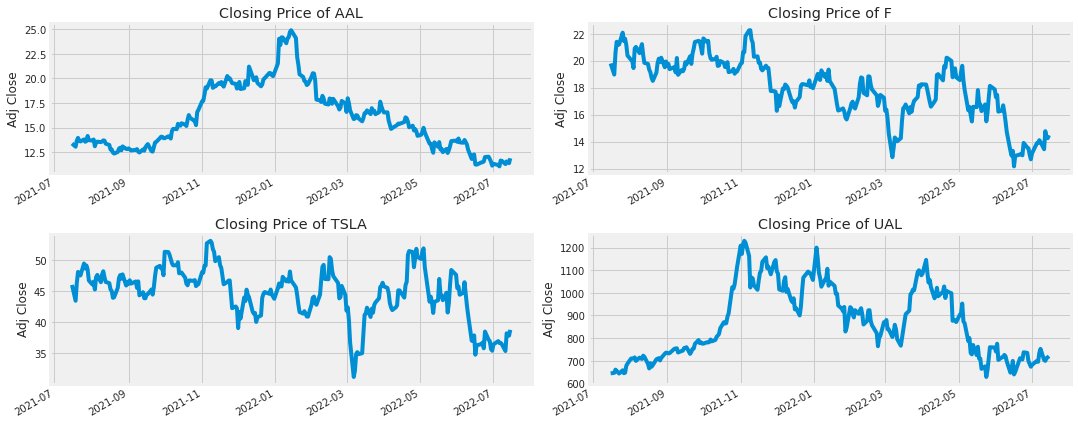

In [ ]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

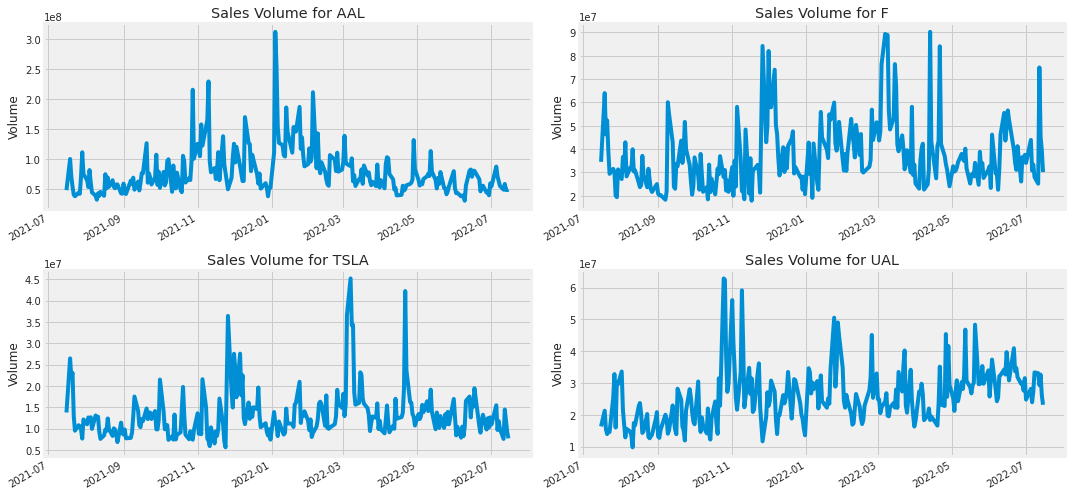

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [ ]:
#print(GOOG.columns)

Now let's go ahead and plot all the additional Moving Averages

In [ ]:
# df.groupby("company_name").hist(figsize=(12, 12));

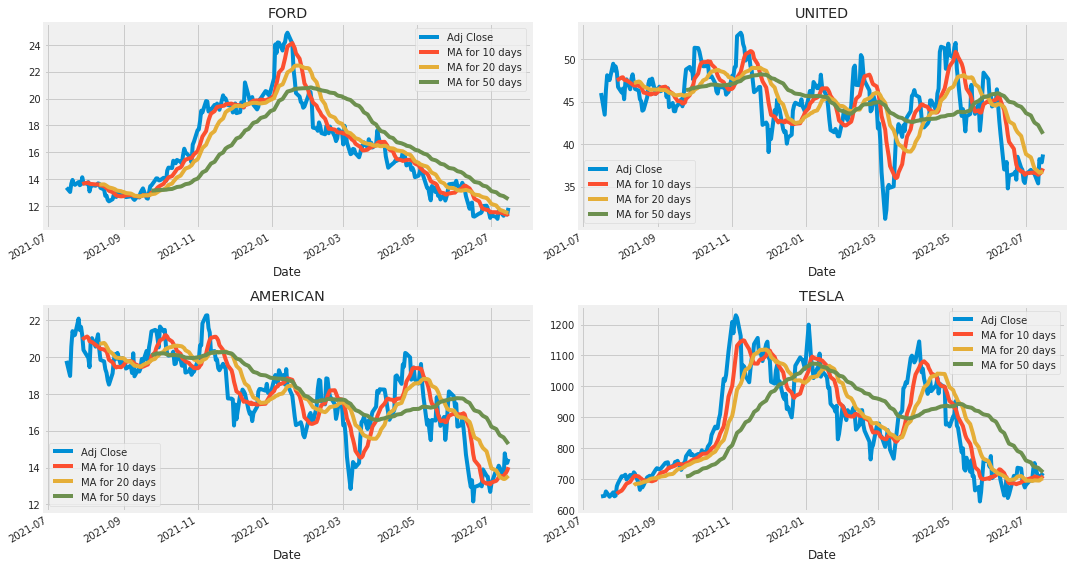

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

F[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('FORD')

UAL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('UNITED')

AAL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('AMERICAN')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TESLA')

fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

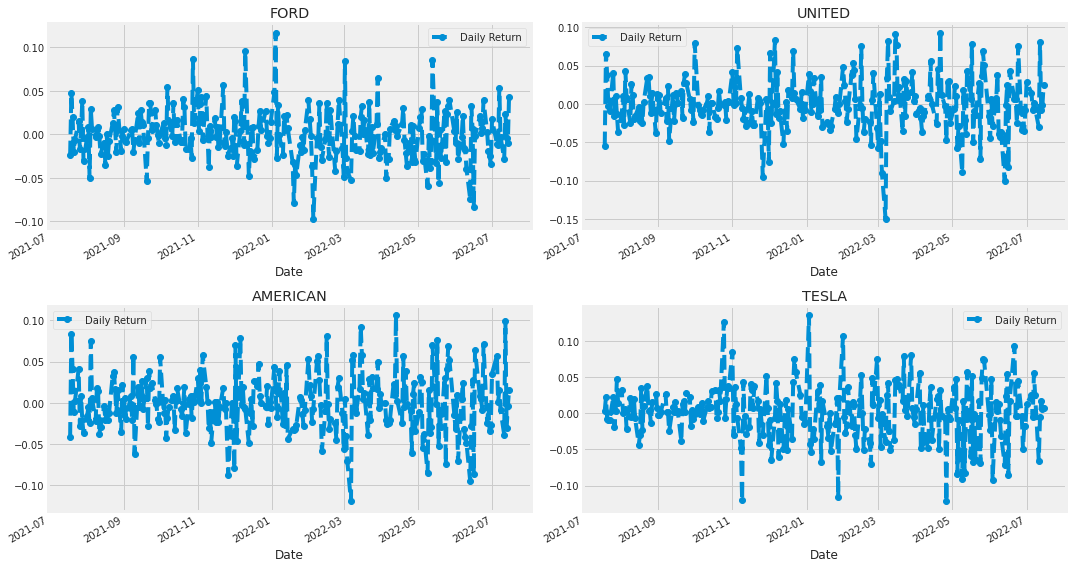

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

F['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('FORD')

UAL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('UNITED')

AAL['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('AMERICAN')

TSLA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TESLA')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

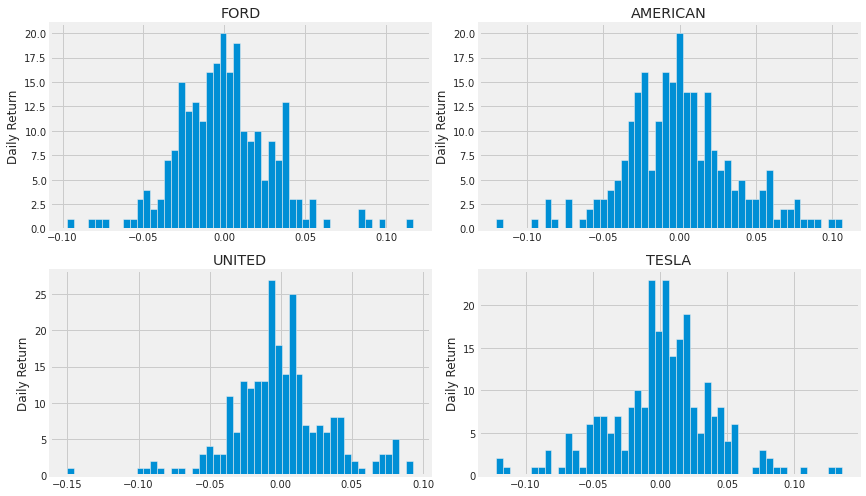

In [ ]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [ ]:
# create empty dataframe
closing_df = yf.download(tech_list,start)['Adj Close']

closing_df.head()

[*********************100%***********************]  4 of 4 completed


,AAL,F,TSLA,UAL
Date,,,,
2021-07-16,19.790001,13.383501,644.219971,46.009998
2021-07-19,18.969999,13.058992,646.219971,43.459999
2021-07-20,20.559999,13.678509,660.500000,46.320000
2021-07-21,21.400000,13.953849,655.289978,48.099998
2021-07-22,21.160000,13.678509,649.260010,47.950001


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [ ]:
# Make a new stock returns DataFrame
stock_rets = closing_df.pct_change()
stock_rets.head()

,AAL,F,TSLA,UAL
Date,,,,
2021-07-16,NaN,NaN,NaN,NaN
2021-07-19,-0.041435,-0.024247,0.003105,-0.055423
2021-07-20,0.083817,0.047440,0.022098,0.065808
2021-07-21,0.040856,0.020129,-0.007888,0.038428
2021-07-22,-0.011215,-0.019732,-0.009202,-0.003118


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

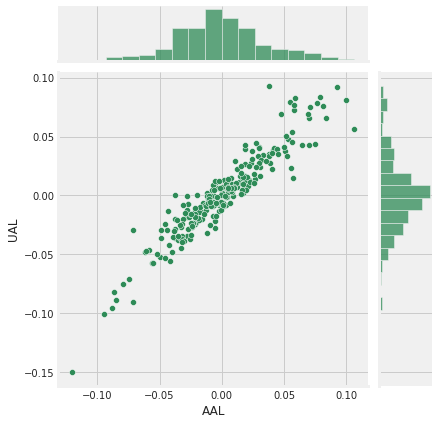

In [ ]:
# Comparing the airlines
sns.jointplot(x='AAL', y='UAL', data=stock_rets, kind='scatter', color='seagreen')

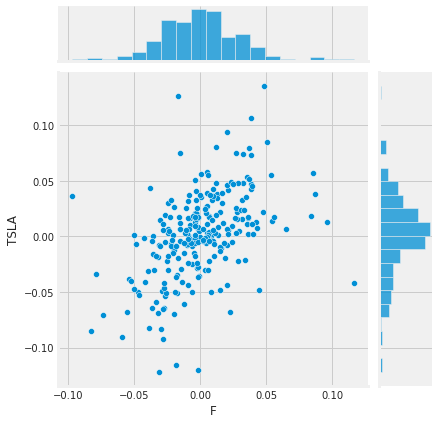

In [ ]:
# We'll use joinplot to compare the daily returns of Ford and Tesla
sns.jointplot(x='F', y='TSLA', data=stock_rets, kind='scatter')

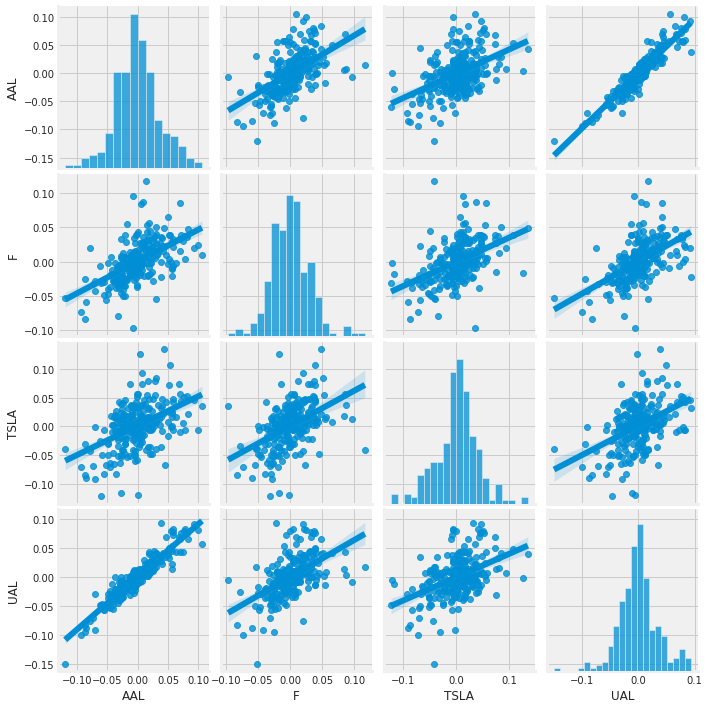

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(stock_rets, kind='reg')

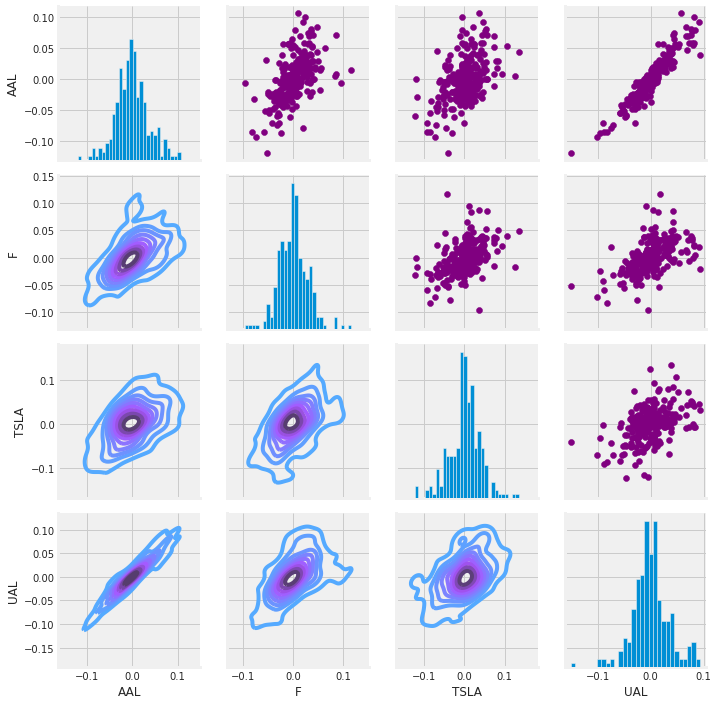

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

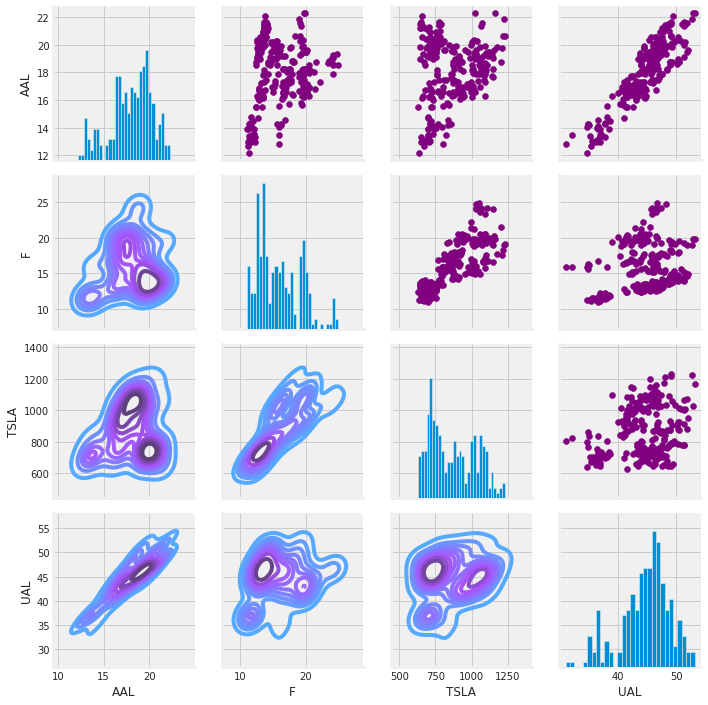

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

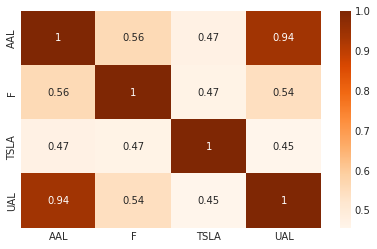

In [ ]:
# Let's go ahead and use seaborn for a quick correlation plot for the daily returns
sns.heatmap(stock_rets.corr(), annot=True, cmap='Oranges')

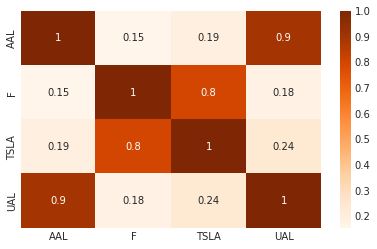

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='Oranges',
           )

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

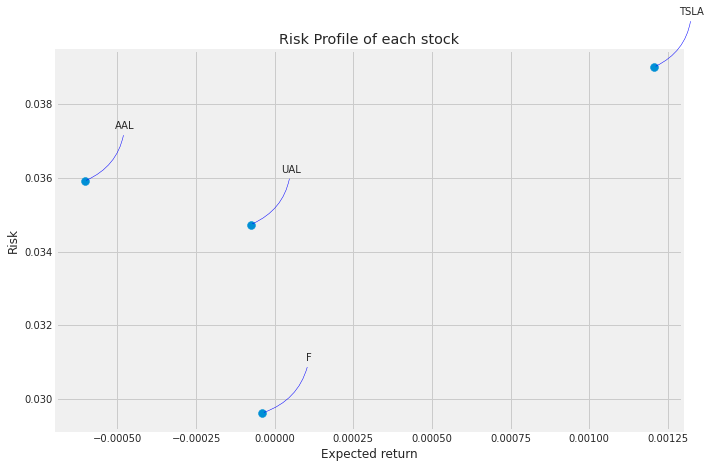

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = stock_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title("Risk Profile of each stock")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Text(0.5, 1.0, 'Risk v Reward')

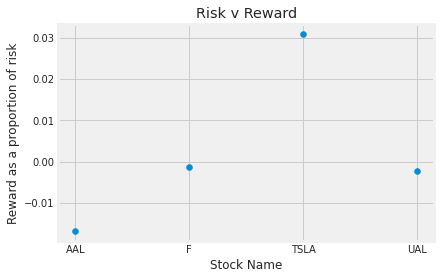

In [ ]:
risk_reward=(rets.mean()/rets.std()) #calculates ratio of risk to reward of each stock
plt.scatter(tech_list,risk_reward)
plt.xlabel("Stock Name")
plt.ylabel("Reward as a proportion of risk")
plt.title("Risk v Reward")

# 6. Predicting the closing price stock price of AMERICAN AIRLINES:

In [ ]:
# Get the stock quote
df = yf.download('UAL','2015-01-01')
# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,67.739998,68.080002,65.709999,66.339996,66.339996,6215000
2015-01-05,66.870003,67.349998,65.500000,66.150002,66.150002,5033400
2015-01-06,66.629997,67.000000,63.110001,64.580002,64.580002,6051700
2015-01-07,64.959999,66.110001,64.000000,65.529999,65.529999,5135000
2015-01-08,65.699997,67.519997,65.410004,66.639999,66.639999,6889500
...,...,...,...,...,...,...
2022-07-11,36.209999,36.490002,35.180000,35.369999,35.369999,7558000
2022-07-12,35.529999,38.650002,35.529999,38.230000,38.230000,14459300
2022-07-13,36.889999,38.169998,36.450001,37.910000,37.910000,11847700


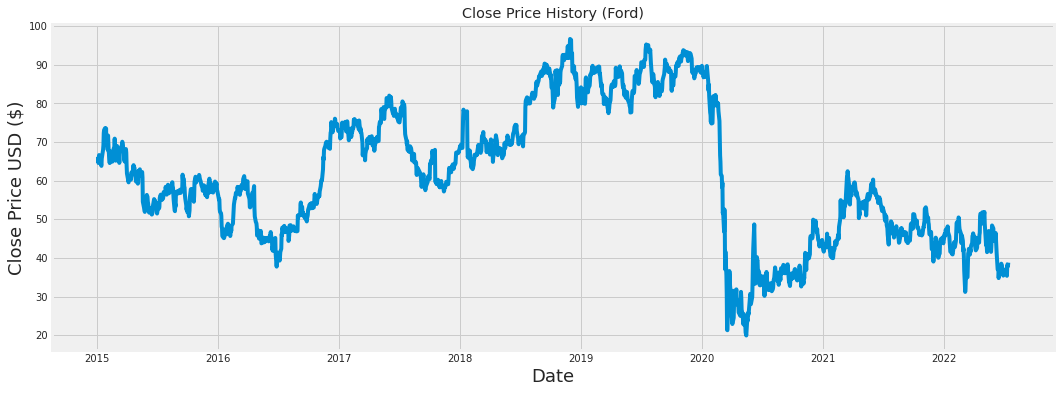

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History (Ford)')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1803

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.6045845 ],
       [0.60210997],
       [0.58166194],
       ...,
       [0.23430582],
       [0.23352434],
       [0.24563688]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.6045845 , 0.60210997, 0.58166194, 0.59403491, 0.60849181,
       0.59156028, 0.59911435, 0.60549629, 0.57475911, 0.57189377,
       0.59690026, 0.62659548, 0.64196407, 0.68272986, 0.6926283 ,
       0.69940095, 0.67569686, 0.66228183, 0.69822872, 0.64404799,
       0.64417816, 0.62581405, 0.67439436, 0.64704351, 0.62073461,
       0.58153167, 0.62138577, 0.61474348, 0.61760873, 0.60315193,
       0.5862204 , 0.60953377, 0.60132845, 0.62633504, 0.63714507,
       0.66384477, 0.63519151, 0.61865069, 0.58947645, 0.61070591,
       0.63922899, 0.63493097, 0.6251628 , 0.60888252, 0.60210997,
       0.58205265, 0.5997656 , 0.62281844, 0.62060434, 0.6251628 ,
       0.64040112, 0.62750717, 0.65342535, 0.64508985, 0.62112533,
       0.62138577, 0.59442562, 0.58674138, 0.62294871, 0.6286794 ])]
[0.6164365961441993]

[array([0.6045845 , 0.60210997, 0.58166194, 0.59403491, 0.60849181,
       0.59156028, 0.59911435, 0.60549629, 0.57475911, 0.57189377,
       0.59690026, 0.62659548, 0.641

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
#model.add(Dense(64,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1743/1743 [==============================] - 72s 40ms/step - loss: 0.0032


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.831218615858051

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


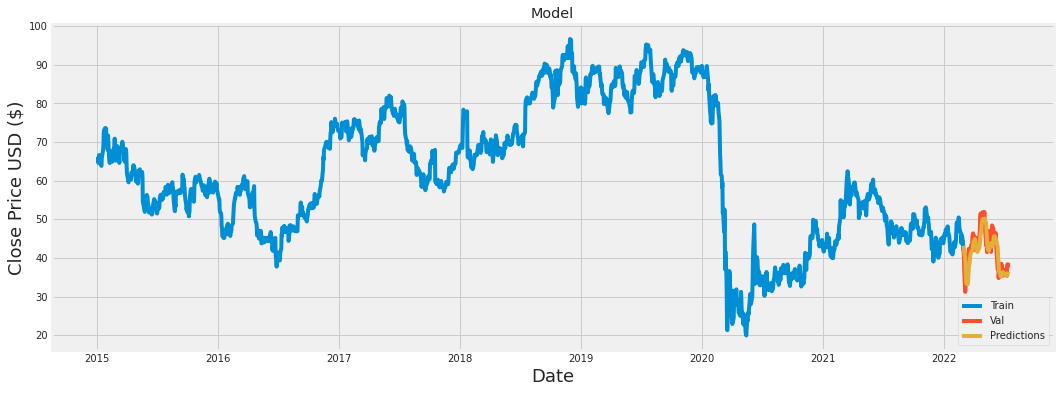

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid


,Close,Predictions
Date,,
2022-03-02,42.419998,43.130318
2022-03-03,40.369999,42.462524
2022-03-04,36.709999,41.596855
2022-03-07,31.200001,40.131508
2022-03-08,32.240002,37.656761
...,...,...
2022-07-11,35.369999,35.737530
2022-07-12,38.230000,35.527653
2022-07-13,37.910000,35.743614
